## Objective:
    The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
## Datasets :
## Data Preprocessing:
    1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
    2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
    3.Use multiple visualizations to understand the hidden patterns in the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('EastWestAirlines.csv',index_col='ID#')
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(1)

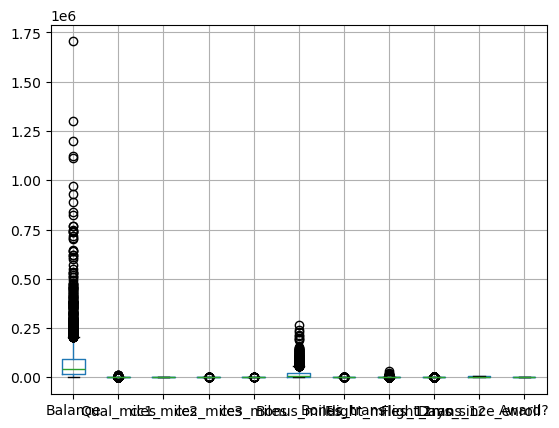

In [5]:
df.boxplot()
plt.show()

In [6]:
def outliercapping(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower=q1 - 1.5*IQR
    upper=q3 + 1.5*IQR
    df[col]=df[col].apply(lambda x:upper if x > upper else lower if x < lower else x)
for col in df.select_dtypes(['int','float']).columns:
    outliercapping(df,col)

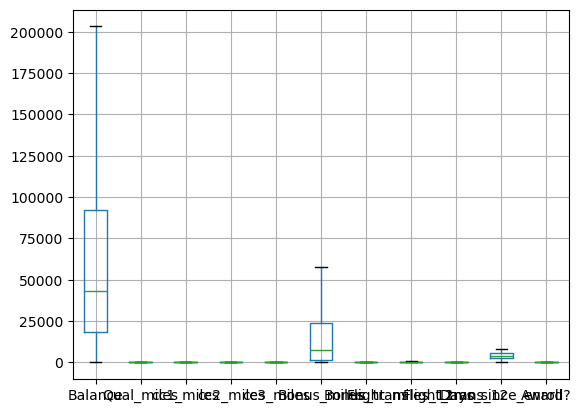

In [7]:
df.boxplot()
plt.show()

In [8]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
std=StandardScaler()
df[['Balance','Bonus_miles', 'Bonus_trans', 
       'Days_since_enroll']]=std.fit_transform(df[['Balance','Bonus_miles', 'Bonus_trans',
       'Days_since_enroll']])
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.607258,0.0,1,1.0,1.0,-0.843091,-1.148854,0.0,0.0,1.395454,0
2,-0.758947,0.0,1,1.0,1.0,-0.840822,-1.039133,0.0,0.0,1.379957,0
3,-0.382070,0.0,1,1.0,1.0,-0.624581,-0.819689,0.0,0.0,1.411920,0
4,-0.835106,0.0,1,1.0,1.0,-0.825052,-1.148854,0.0,0.0,1.372208,0
5,0.579265,0.0,4,1.0,1.0,1.543191,1.594189,777.5,2.5,1.363975,1


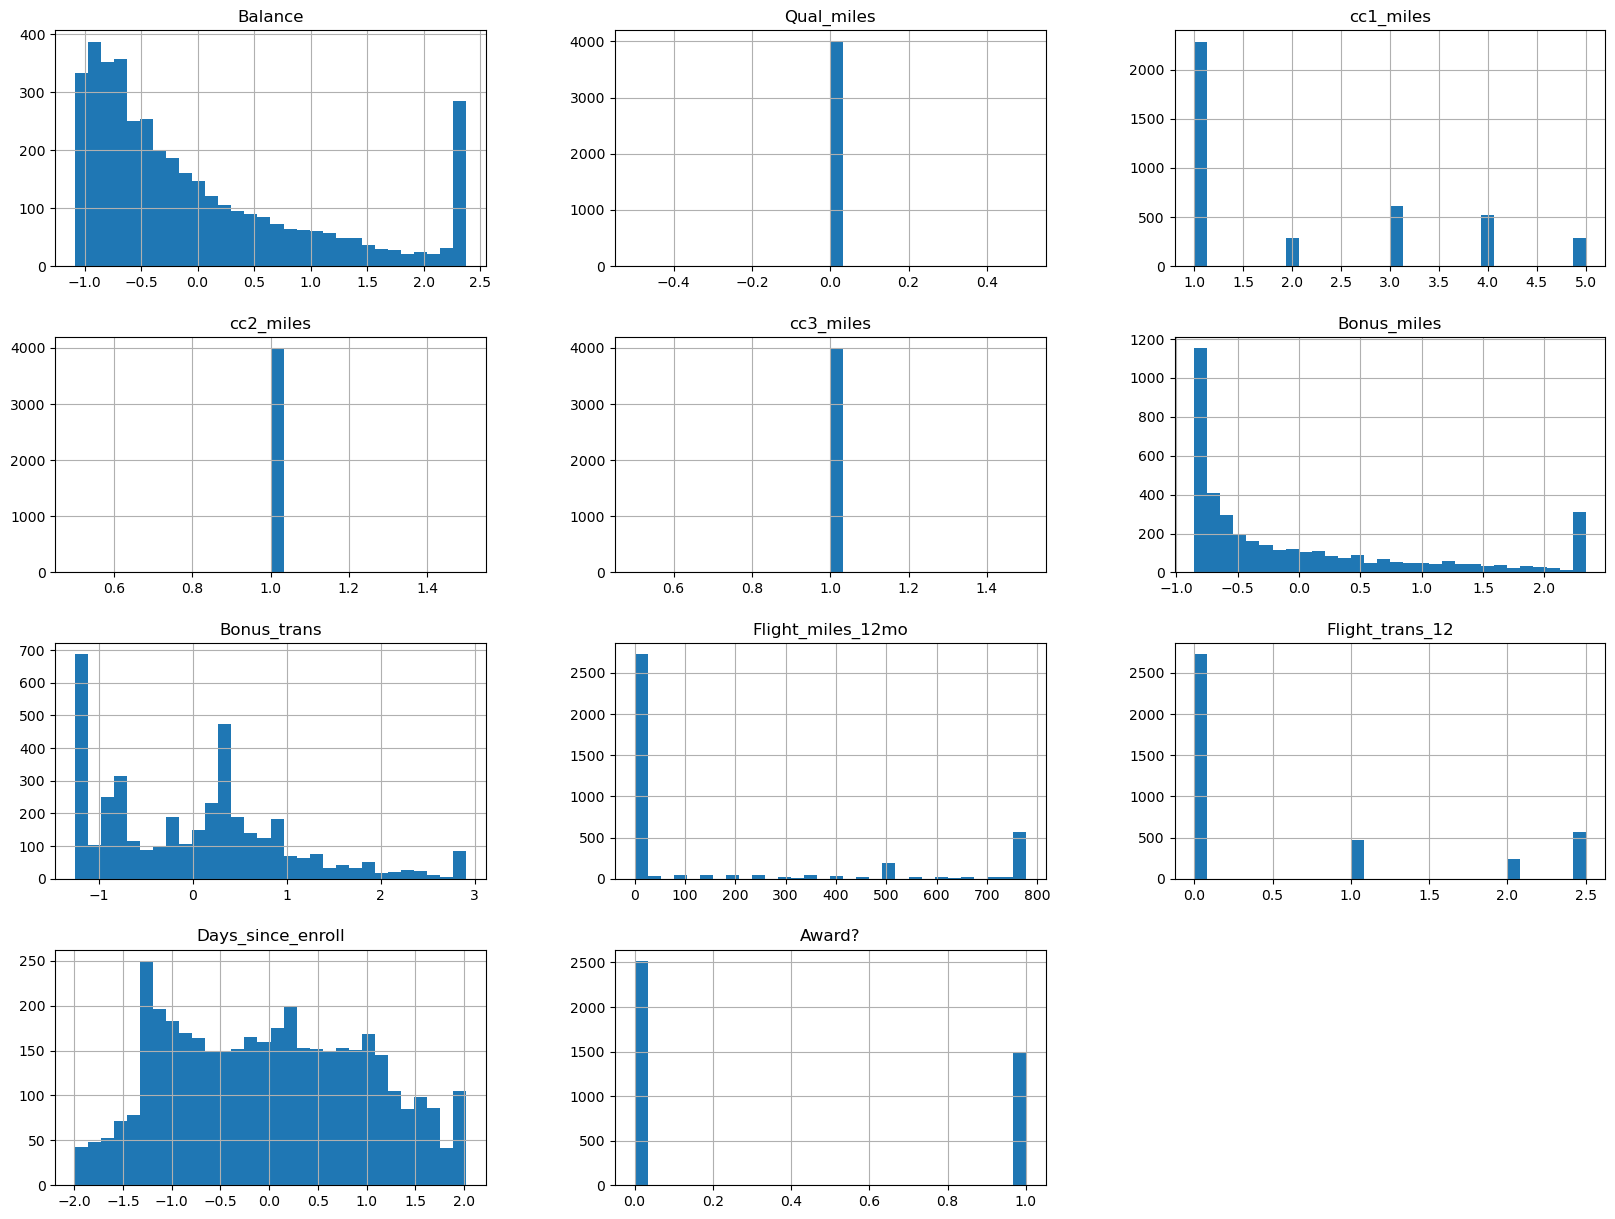

In [10]:
df.hist(bins=30, figsize=(20,15))
plt.show()

## Implementing Clustering Algorithms:
    • Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
    • Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
    • Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [29]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [30]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1], shape=(3999,), dtype=int32)

In [31]:
silhouette_score(df,kmeans.labels_)

np.float64(0.911372214387014)

In [32]:
Agg=AgglomerativeClustering(n_clusters=2,linkage='ward')
Agg.fit(df)

AgglomerativeClustering()

In [33]:
Agg.labels_

array([1, 1, 1, ..., 1, 0, 1], shape=(3999,))

In [34]:
silhouette_score(df,Agg.labels_)

np.float64(0.8861189836683314)

In [35]:
DB=DBSCAN(eps=3,min_samples=10)
DB.fit(df)

DBSCAN(eps=3, min_samples=10)

In [36]:
DB.labels_

array([0, 0, 0, ..., 0, 5, 0], shape=(3999,))

In [37]:
silhouette_score(df,DB.labels_)

np.float64(0.887237431519613)

In [38]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(df,method='ward'))

In [39]:
wcss = [] 

for k in range(1, 11):   
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

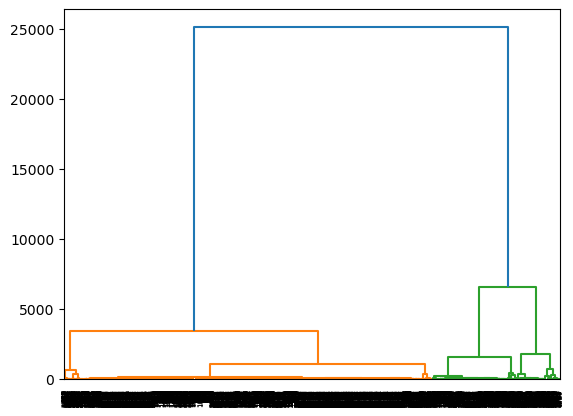

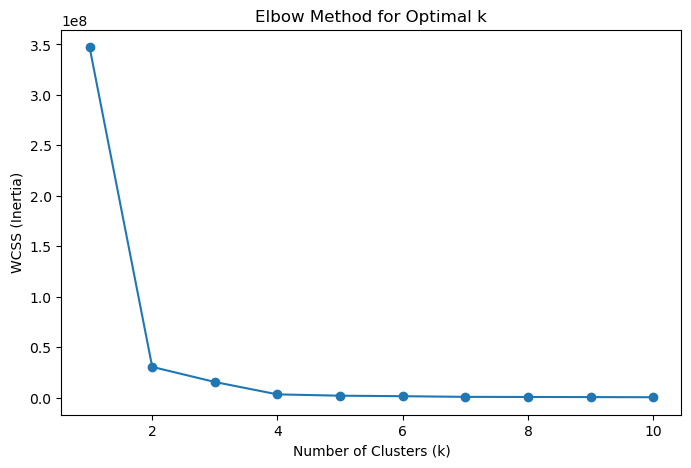

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [41]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [42]:
silhouette_score(df,kmeans.labels_)

np.float64(0.8864848278759098)

In [47]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [48]:
silhouette_score(df,kmeans.labels_)

np.float64(0.9010132227284541)

In [43]:
Agg=AgglomerativeClustering(n_clusters=2,linkage='complete')
Agg.fit(df)

AgglomerativeClustering(linkage='complete')

In [44]:
silhouette_score(df,Agg.labels_)

np.float64(0.8882523195468518)

In [45]:
Agg=AgglomerativeClustering(n_clusters=2,linkage='average')
Agg.fit(df)

AgglomerativeClustering(linkage='average')

In [46]:
silhouette_score(df,Agg.labels_)

np.float64(0.8861189836683314)

In [49]:
DB=DBSCAN(eps=4,min_samples=15)
DB.fit(df)

DBSCAN(eps=4, min_samples=15)

In [51]:
silhouette_score(df,DB.labels_)

np.float64(0.8956878449049005)

In [52]:
DB=DBSCAN(eps=3,min_samples=15)
DB.fit(df)

DBSCAN(eps=3, min_samples=15)

In [53]:
silhouette_score(df,DB.labels_)

np.float64(0.8579389829965826)

## Cluster Analysis and Interpretation:
    • Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.
                    Kmeans is simple and provides a better result . We can find the best hyperparamter using elbow method.Hierachy is quit tough since it has five types of linkages.To search the best hyperparamter will be difficult.We can visualize the subclusters properly.In DBSCAN we can able to clearly visualize the outliers.

## Visualization:
    Visualize the clustering results using scatter plots or other suitable visualization techniques.
    Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

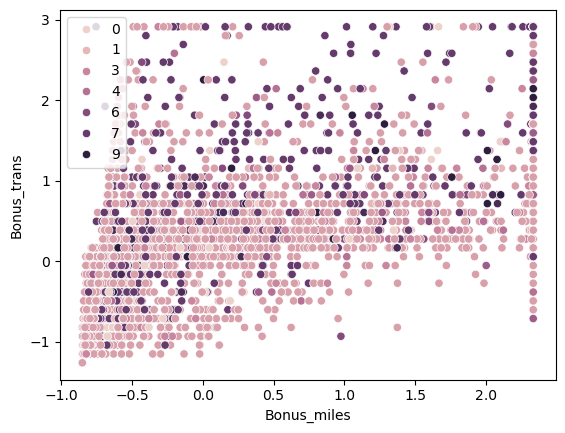

In [23]:
sns.scatterplot(data=df,x='Bonus_miles',y='Bonus_trans',hue=kmeans.labels_)
plt.show()

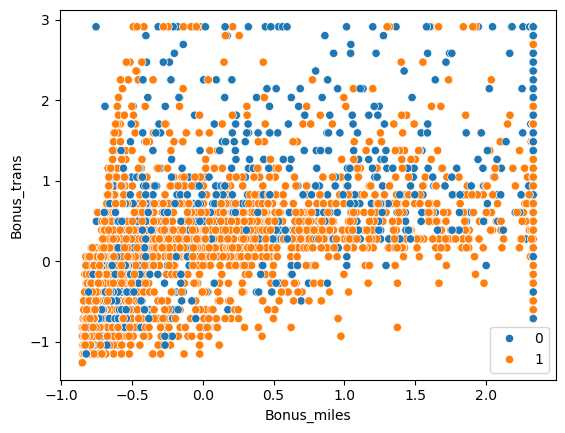

In [24]:
sns.scatterplot(data=df,x='Bonus_miles',y='Bonus_trans',hue=Agg.labels_)
plt.show()

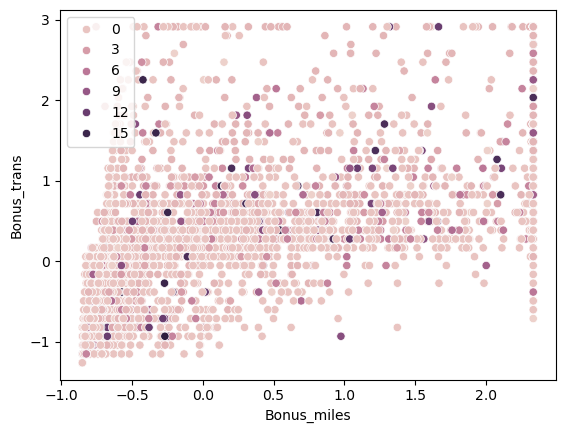

In [25]:
sns.scatterplot(data=df,x='Bonus_miles',y='Bonus_trans',hue=DB.labels_)
plt.show()

## Evaluation and Performance Metrics:
    Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [26]:
silhouette_score(df,kmeans.labels_)

np.float64(0.9087364346636322)

In [27]:
silhouette_score(df,DB.labels_)

np.float64(0.887237431519613)

In [28]:
silhouette_score(df,Agg.labels_)

np.float64(0.8861189836683314)